In [1]:
from IPython.display import Markdown

import sys
sys.path.append('..')
from utils import *

In [2]:
prompt_template='../prompt_template.md'
arxiv_number='2111.01152'
prompt_dict=load_prompt_template(prompt_template)
with open(f'{arxiv_number}.yaml','r') as f:
    kwargs= yaml.safe_load(f)

In [3]:
prompt=generate_prompt(kwargs[2],prompt_dict)

In [4]:
Markdown(prompt['content'])

You will be instructed to construct each term, namely $H_{\tau}$.  
For all energy dispersions, $H_{\tau}$, it characterizes the parabolic dispersion for holes.   
In addition, a shift of $+\kappa$ and $-\kappa$ in the momentum $\bm{k}$ for $E_{t,+K}$ and $E_{t,-K}$, respectively.  
You should follow the EXAMPLE below to obtain correct energy dispersion, select the correct EXAMPLE by noticing the type of dispersion.  
Finally, in the real space, the momentum $\bm{k}=-i \partial_{\bm{r}}$. You should keep the form of $\bm{k}$ in the Hamiltonian for short notations but should remember $\bm{k}$ is an operator.  
You should recall that $H_{Kinetic}(r) = \begin{pmatrix} E_{+K,b} & 0 & 0 & 0 \\ 0 & E_{+K,t} & 0 & 0 \\ 0 & 0 & E_{-K,b} & 0 \\ 0 & 0 & 0 & E_{-K,t} \end{pmatrix}$.    
Return the expression for $H_{\tau}$ in the Kinetic Hamiltonian, and substitute it into the Kinetic Hamiltonian $\hat{\mathcal{H}}_0$.  

Use the following conventions for the symbols (You should also obey the conventions in all my previous prompts if you encounter undefined symbols. If you find it is never defined or has conflicts in the conventions, you should stop and let me know):  
$\tau=\pm 1$ represents $\pm K$ valleys, $\bm{\kappa}=\frac{4\pi}{3a_M}\left(1,0\right)$  is at a corner of the  moir\'e Brillouin zone, the $2\times 2$ Hamiltonian hybridizes the bottom layer ($\mathfrak{b}$) and top layer ($\mathfrak{t}$), the off diagonal terms describe the interlayer tunneling $\Delta_{\text{T},\tau}$, and the diagonal terms describe the momentum-shifted kinetic energy with the effective mass $(m_{\mathfrak{b}},m_{\mathfrak{t}})=(0.65,0.35)m_e$ ($m_e$ is the rest electron mass), plus the intralayer potential $\Delta_{\mathfrak{b}/\mathfrak{t}}$, and a band offset $V_{z\mathfrak{t}}$

===  
EXAMPLE 1:  
A parabolic dispersion for electron is $E_{\alpha}=\frac{\hbar^2 k^2}{2m_{\alpha}}$, where $\alpha$ indicates the type of electron.  If there is a further shift of $q$ in the momentum $k$, the dispersion will become $E_{\alpha}=\frac{\hbar^2 (k-q)^2}{2m_{\alpha}}$.

EXAMPLE 2:
A parabolic dispersion for hole is $E_{\alpha}=-\frac{\hbar^2 k^2}{2m_{\alpha}}$, where $\alpha$ indicates the type of hole.  If there is a further shift of $q$ in the momentum $k$, the dispersion will become $E_{\alpha}=-\frac{\hbar^2 (k-q)^2}{2m_{\alpha}}$.

EXAMPLE 3:  
A dirac dispersion for electron/hole is a 2 by 2 matrix, i.e., $h_{\theta}(k)=-\hbar v_D |k| \begin{pmatrix}  0 & e^{i(\theta_{k}-\theta)}\\ e^{-i(\theta_{\bar{k}}-\theta)} & 0 \end{pmatrix}$, where $v_D$ is the Fermi velocity, $\theta$ is the twist angle, and $\theta_k$ indicates the azumith angle of $k$. If there is a further shift of $K_{\theta}$ in the momentum $k$, the dispersion will become $h_{\theta}(k)=-\hbar v_D |k-K_{\theta}| \begin{pmatrix}  0 & e^{i(\theta_{k-K_{\theta}}-\theta)}\\ e^{-i(\theta_{k-K_{\theta}}-\theta)} & 0 \end{pmatrix}$.

In [5]:
print(prompt['content'])

You will be instructed to describe the kinetic term of Hamiltonian in a system with two layers in the real space in the single-particle form.   
The degrees of freedom of the system are: valley index (+K and -K valley), layer index (top and bottom layer)..  
Express the Kinetic Hamiltonian H_{\tau} using variables which are only on the diagonal terms, and arrange the basis in the order of (+K,bottom), (+K,top), (-K,bottom), (-K,top). 

Use the following conventions for the symbols:  
$\tau=\pm 1$ represents $\pm K$ valleys, $\bm{\kappa}=\frac{4\pi}{3a_M}\left(1,0\right)$ is at a corner of the moiré Brillouin zone. The $2\times 2$ Hamiltonian hybridizes the bottom layer ($\mathfrak{b}$) and top layer ($\mathfrak{t}$), where the off diagonal terms describe the interlayer tunneling $\Delta_{\text{T},\tau}$, and the diagonal terms describe the momentum-shifted kinetic energy with the effective mass $(m_{\mathfrak{b}},m_{\mathfrak{t}})=(0.65,0.35)m_e$ ($m_e$ is the rest electron mass), plus

In [88]:
with open(f'{arxiv_number}_tmp.yaml','w') as f:
    # kwargs= yaml.safe_load(f)
    yaml.dump(prompt,f,default_flow_style=False,sort_keys=False)

In [11]:
data = {
    'key': 'this is line1\nthis is line2\n'
}

with open(f'{arxiv_number}_tmp.yaml','w') as file:
    yaml.dump(data, file,default_style='|', default_flow_style=False)

In [13]:
import matplotlib as plt

In [16]:
kwargs[1]['score']

{'prompt_quality': 1,
 'follow_instructions': 1,
 'physics_logic': 2,
 'math_derivation': 2,
 'final_answer_accuracy': 1}

In [66]:
kwarg['score']

{'prompt_quality': 2,
 'follow_instructions': 1,
 'physics_logic': 2,
 'math_derivation': 2,
 'final_answer_accuracy': 1}

In [82]:
kwarg['score'].items()

dict_items([('prompt_quality', 1), ('follow_instructions', 1), ('physics_logic', 2), ('math_derivation', 2), ('final_answer_accuracy', 1)])

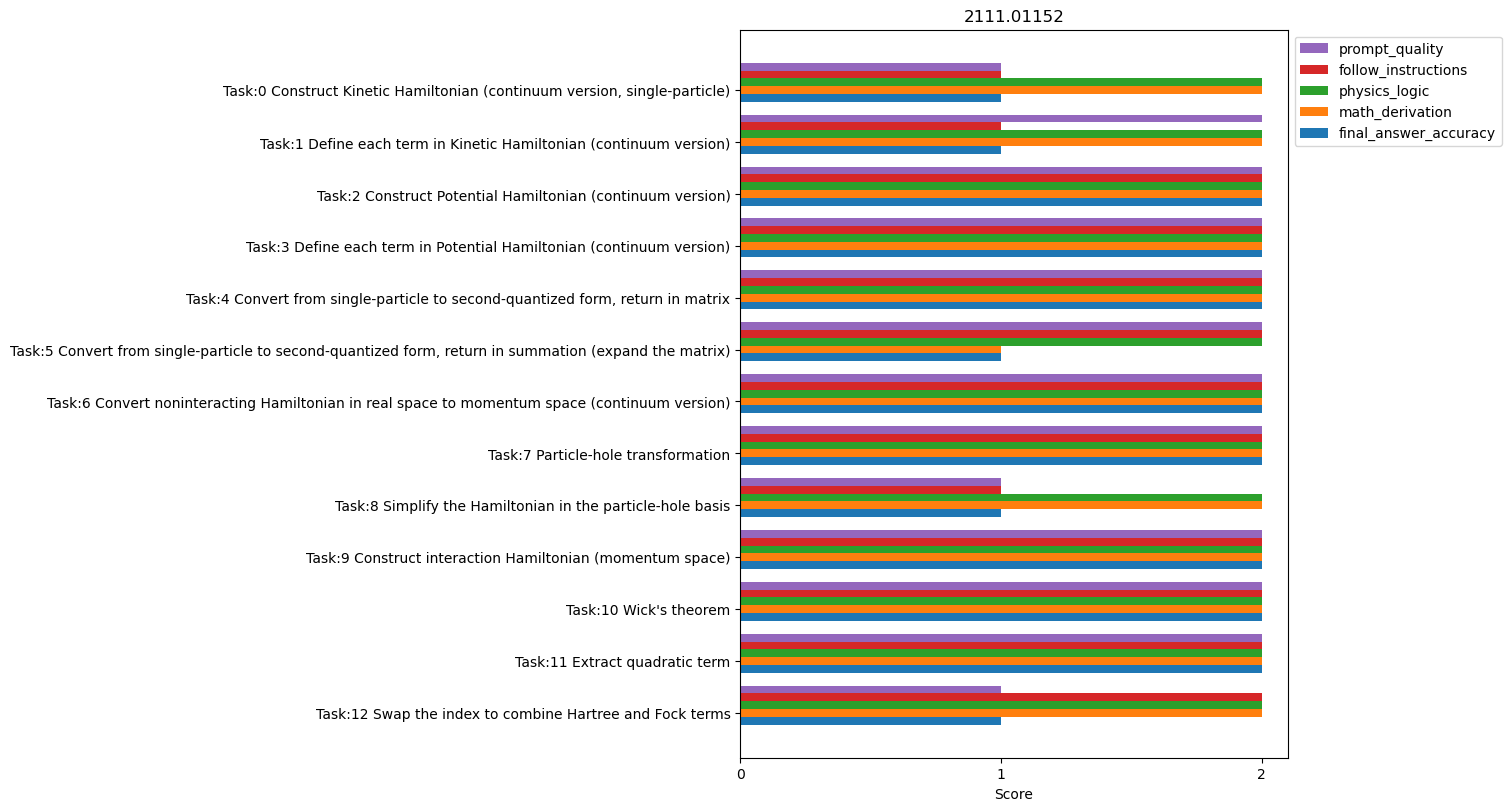

In [90]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

tasks = [f'Task:{len(kwargs)-idx-2} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[:0:-1])]
aspect_score={}
for kwarg in kwargs[:0:-1]:
    for key,value in reversed(list(kwarg['score'].items())):
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)


x = np.arange(len(tasks))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(15,8))

for attribute, measurement in aspect_score.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Score')
ax.set_xticks([0,1,2])
ax.set_title(f'{arxiv_number}')
ax.set_yticks(x + width, tasks)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='upper left', ncols=1,bbox_to_anchor=(1, 1))


# ax.set_ylim(0, 250)

plt.show()

In [65]:
aspect_score

{'prompt_quality': [1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2],
 'follow_instructions': [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1],
 'physics_logic': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'math_derivation': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2],
 'final_answer_accuracy': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1]}

In [75]:
aspect_score={}

for kwarg in kwargs[:0:-1]:
    for key,value in kwarg['score'].items():
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)

In [76]:
aspect_score


{'prompt_quality': [1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1],
 'follow_instructions': [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1],
 'physics_logic': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'math_derivation': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
 'final_answer_accuracy': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1]}